# 시각화 도구
### 1. Matplotlib - 기본 그래프 도구
Matplotlib은 파이썬 표준 시각화 도구라고 부를 수 있을 정도로 2D 평면 그래프에 관한 다양한 포맷과 기능을 지원한다.
##### &nbsp;
 __1. 선그래프__

선 그래프는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다. 

특히 시계열 데이터와 같이 연속적인 값의 변화와 패터을 파악하는데 적합하다.

+ 선그래프 그리기

1. excel 파일 불러오기
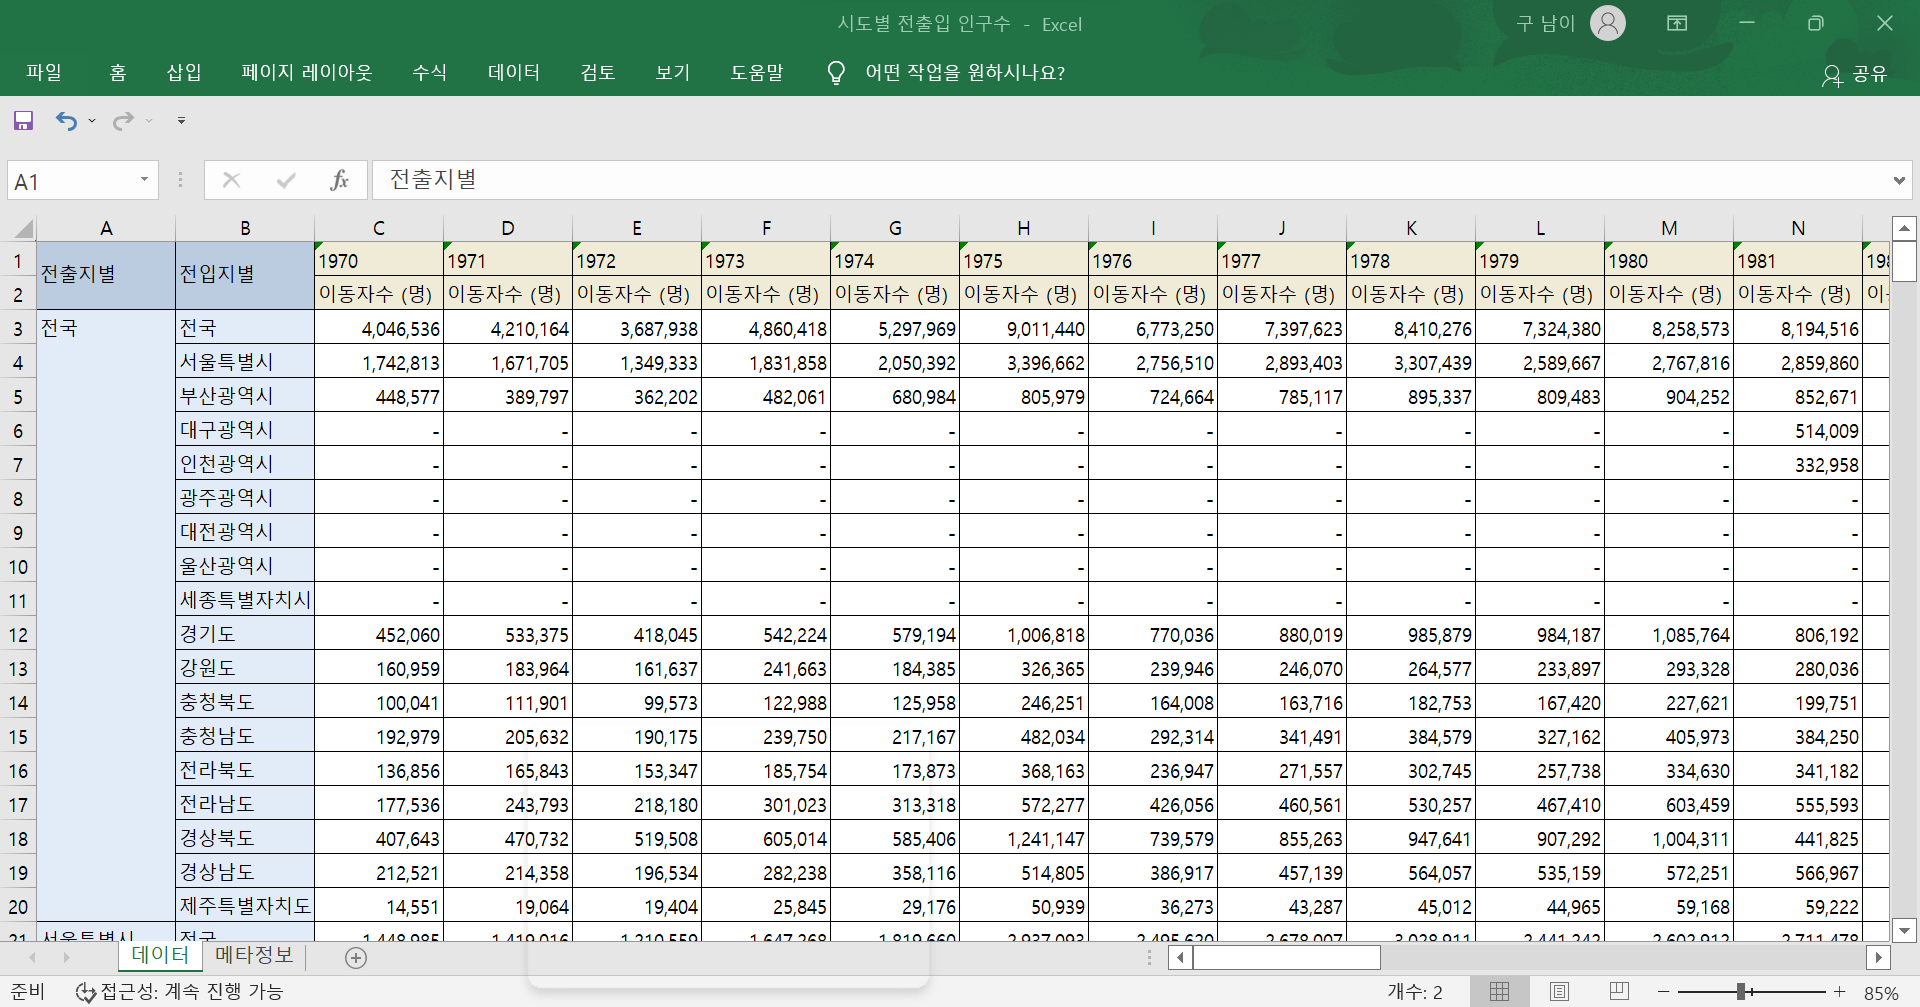

In [72]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환하기
df = pd.read_excel(r"C:\Users\구남이\Downloads\5674-833_4th\part4\시도별 전출입 인구수.xlsx", engine = 'openpyxl', header = 0)
print(df)

     전출지별     전입지별      1970      1971      1972      1973      1974  \
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1      전국       전국   4046536   4210164   3687938   4860418   5297969   
2     NaN    서울특별시   1742813   1671705   1349333   1831858   2050392   
3     NaN    부산광역시    448577    389797    362202    482061    680984   
4     NaN    대구광역시         -         -         -         -         -   
..    ...      ...       ...       ...       ...       ...       ...   
320   NaN     전라북도       139       202       141       210       219   
321   NaN     전라남도       631       965       857       952      1133   
322   NaN     경상북도       374       619       468       576       625   
323   NaN     경상남도       474       479       440       571      1208   
324   NaN  제주특별자치도      9290     12427     12210     16158     19580   

         1975      1976      1977  ...      2008      2009      2010  \
0    이동자수 (명)  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자

In [73]:
# 누락값(NaN)을 앞 데이터로 채우기
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') # 불 자료형
df_seoul = df[mask] # 데이터프레임으로 변환
df_seoul = df_seoul.drop(['전출지별'],axis=1) # 전출지별 열 삭제
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 전입지별 열 이름을 전입지로 변경
df_seoul.set_index('전입지', inplace=True) # '전입지'열을 행 인덱스로 사용

print(df_seoul)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

print(sr_one)

            1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   
경기도       130149   150313    93333   143234   149045   253705   202276   
강원도         9352    12885    13561    16481    15479    27837    25927   
충청북도        6700     9457    10853    12617    11786    21073    18029   
충청남도       15954    18943    23406    

선 그래프를 그릴 때는 x, y축 데이터를 plot 함수에 직접 입력하거나 

시리즈 또는 데이터프레임 객체를 plot() 함수에 직접 입력할 수 도 있다.

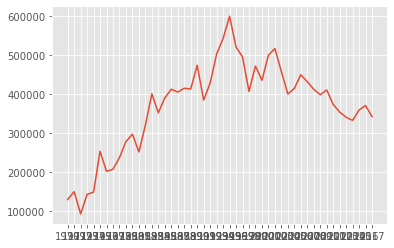

In [74]:
# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

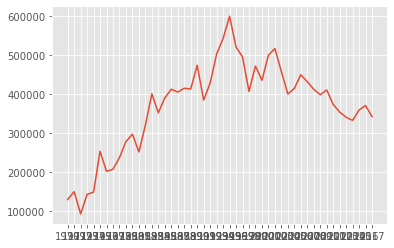

In [75]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

+ 차트 제목, 축 이름 추가
  
차트 제목 추가 : title( )

x축 이름 추가 : xlabel( )

y축 이름 추가 : ylabel( )

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

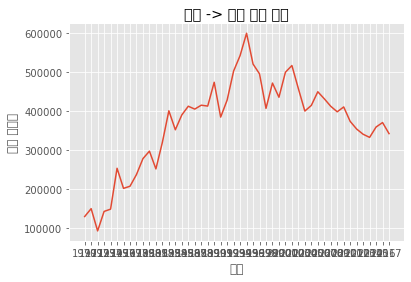

In [63]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

+ Matplotlib 한글 폰트 오류 해결하기

Matplotlib을 사용하는 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 코드를 추가한다. 

In [77]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = r"C:\Users\구남이\Downloads\5674-833_4th\part4\malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

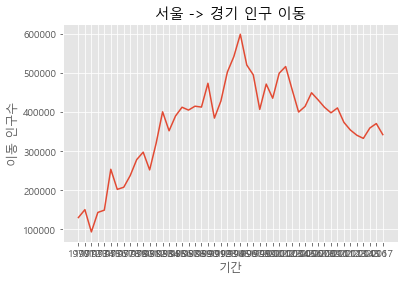

In [78]:
# 한글 폰트 오류 문제 해결, 선 그래프 그리기, 차트 제목, 축 이름 추가하기 

# 라이브러리 불러오기 
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = r"C:\Users\구남이\Downloads\5674-833_4th\part4\malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel(r"C:\Users\구남이\Downloads\5674-833_4th\part4\시도별 전출입 인구수.xlsx", engine = 'openpyxl', header = 0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채우기
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show () # 변경사항 저장하고 그래프 출력

+ 맥 OS 사용시 한글 폰트 지정하기
맥OS 폰트를 rc 명령에 직접 지정하는 방법을 사용한다. 

In [66]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import rc
rc('font', family = 'AppleGothic')

+ 그래프 꾸미기

그래프 사이즈 지정하기 : figure(figsize=(가로 길이, 세로길이)

x축 눈금 라벨을 반시계 방향으로 90˚ 회전하기 : xticks(rotation = 원하는 각도)

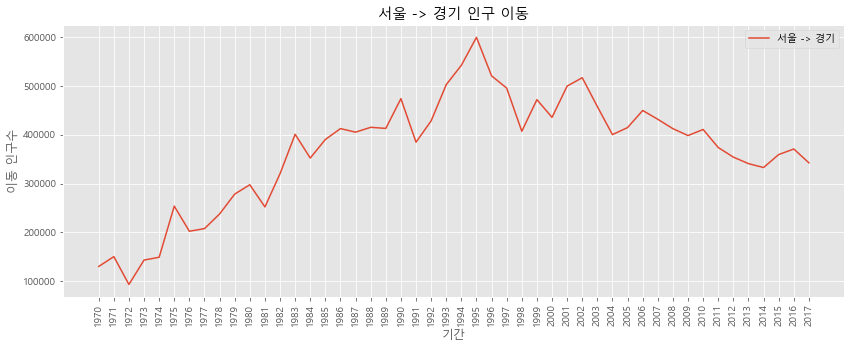

In [79]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# xc축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간')                  # x축 이름
plt.ylabel('이동 인구수')           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')   # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력

+ Matplotlib 스타일 서식 지정 (색, 폰트 등 디자인적 요소 지정하기)

스타일 서식 지정 : plt.style.use(스타일 서식)

폰트 크기 지정 : xticks(rotation = 원하는 각도, size = 폰트 크기)

마커 표시 : plot( x축 데이터, y축 데이터, marker = 원하는 점 모양, markersize = 점 크기)

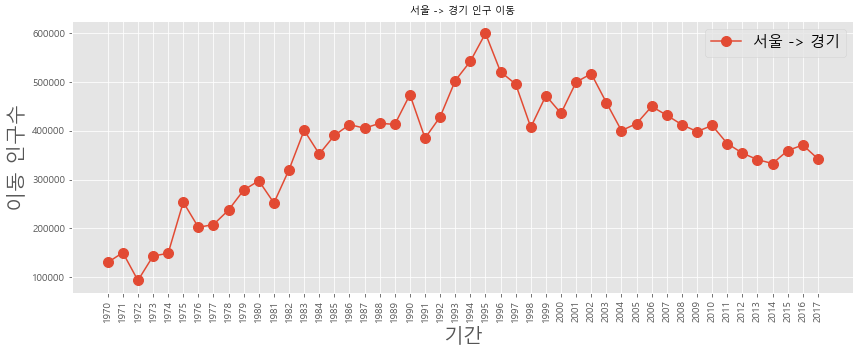

In [80]:
#  서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size = 10) # 차트 제목
plt.xlabel('기간', size = 20)                  # x축 이름
plt.ylabel('이동 인구수', size = 20)           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력

> + Matplotlib 스타일 서식의 종류
> 'ggplot' 외의 스타일 서식
>
> 스타일의 종류 : 'classic','bmh', 'dark_background','fast','grayscale','seaborn' 등
>
>+ Matplotlib 스타일 리스트 출력하기

In [81]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


스타일이 어떻게 적용되는지 상세한 정보가 필요할땐 https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 참조

+ 그래프에 설명을 덧붙이는 주석
annotate( ) 함수 사용

주석 내용을 넣을 위치와 정렬 방법 등을 annotate( ) 함수에 함께 전달

arrowpops 옵션을 사용하면 텍스트 대신 화살표가 표시된다. 

화살표 스타일, 시작점과 끝점의 좌표를 입력한다.

Text(38, 490000, '인구 이동 감소(1995-2017)')

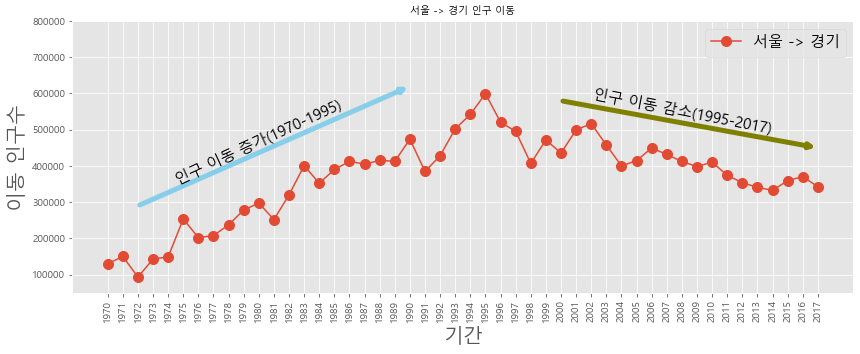

In [100]:
#  서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size = 10) # 차트 제목
plt.xlabel('기간', size = 20)                  # x축 이름
plt.ylabel('이동 인구수', size = 20)           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy = (20, 620000),                                                  # 화살표의 머리부분(끝점)
             xytext = (2, 290000),                                               # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',                                                  # 좌표체계
             arrowprops = dict(arrowstyle = "->", color = 'skyblue', lw = 5),   # 화살표 서식
            )

plt.annotate('',
             xy = (47, 450000),                                                  # 화살표의 머리부분(끝점)
             xytext = (30, 580000),                                              # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',                                                  # 좌표체계
             arrowprops = dict(arrowstyle = "->", color = 'olive', lw = 5),     # 화살표 서식
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',                                      # 텍스트 입력
             xy = (10, 350000),                                                  # 텍스트 위치 기준점
             rotation = 25,                                                      # 텍스트 회전 각도
             va = 'baseline',                                                     # 텍스트 상하 정렬
             ha = 'center',                                                      # 텍스트 좌우 정렬
             fontsize = 15,                                                      # 텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)',                                      # 텍스트 입력
             xy = (38, 490000),                                                  # 텍스트 위치 기준점
             rotation = -11,                                                      # 텍스트 회전 각도
             va = 'baseline',                                                     # 텍스트 상하 정렬
             ha = 'center',                                                      # 텍스트 좌우 정렬
             fontsize = 15,                                                      # 텍스트 크기
             )

1990년대 중반까지 경기도권 5대 신도시 개발로 서울 인구의 대규모 경기도 유입이 있었음을 추정할 수 있다. 

이 시기를 정점으로 서울에서 경기권으로 이동하는 인구는 현재까지 계속 감소하는 트렌드를 보이고 있다.

&nbsp;

+ 화면 분할하여 그래프 여러 개 그리기

여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정한다. axe 객체는 각각 서로 다른 크래프를 표현할 수 있다.

figure() 함수를 사용하여 그래프를 그리는 그림틀(fig)을 만든다. figsize 옵션으로 (가로, 세로) 그림틀의 크기를 설정한다. fig 객체에 add_subplot() 메소드를 적용하여 그림틀을 여러 개로 분할한다. 이때 나눠진 각 부분을 axe 객체라고 부른다.

add_subplot() 메소드의 인자에 "행의 크기, 열의 크기, 서브플롯 순서"를 순서대로 입력한다.

각 axe 객체에 plot() 메소드를 적용하여 그래프를 출력한다.

Text(38, 490000, '인구 이동 감소(1995-2017)')

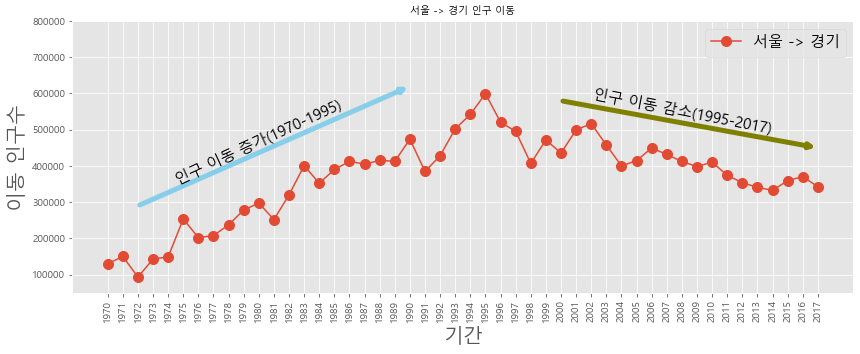

In [106]:
#  서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size = 10) # 차트 제목
plt.xlabel('기간', size = 20)                  # x축 이름
plt.ylabel('이동 인구수', size = 20)           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy = (20, 620000),                                                  # 화살표의 머리부분(끝점)
             xytext = (2, 290000),                                               # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',                                                  # 좌표체계
             arrowprops = dict(arrowstyle = "->", color = 'skyblue', lw = 5),   # 화살표 서식
            )

plt.annotate('',
             xy = (47, 450000),                                                  # 화살표의 머리부분(끝점)
             xytext = (30, 580000),                                              # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',                                                  # 좌표체계
             arrowprops = dict(arrowstyle = "->", color = 'olive', lw = 5),     # 화살표 서식
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',                                      # 텍스트 입력
             xy = (10, 350000),                                                  # 텍스트 위치 기준점
             rotation = 25,                                                      # 텍스트 회전 각도
             va = 'baseline',                                                     # 텍스트 상하 정렬
             ha = 'center',                                                      # 텍스트 좌우 정렬
             fontsize = 15,                                                      # 텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)',                                      # 텍스트 입력
             xy = (38, 490000),                                                  # 텍스트 위치 기준점
             rotation = -11,                                                      # 텍스트 회전 각도
             va = 'baseline',                                                     # 텍스트 상하 정렬
             ha = 'center',                                                      # 텍스트 좌우 정렬
             fontsize = 15,                                                      # 텍스트 크기
             )

C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/1172957301.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/1172957301.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


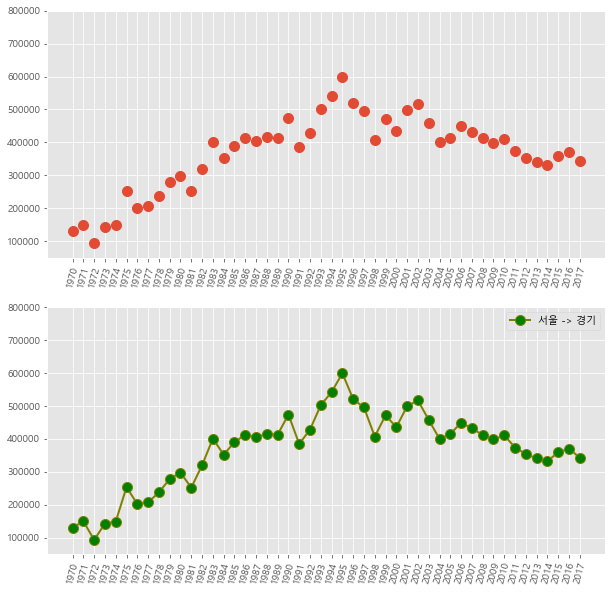

In [107]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show() # 변경사항 저장하고 그래프 출력

> + 선 그래프의 꾸미기 옵션
>
> 꾸미기 옵션 | 설명
> ------------|------
> 'o'|선 그래프가 아니라 점 그래프로 표현
> marker='o' | 마커 모양(예 : 'o', '+', '*', '-')
> markerfacecolor='green'|마커 배경색
> markersize=10 | 마커 크기
> color='olive' | 선의 색
> linewidth=2 | 선의 두께
> label='서울 => 경기' | 라벨 지정

+ axe 객체 그래프 꾸미기

C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/3211942334.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


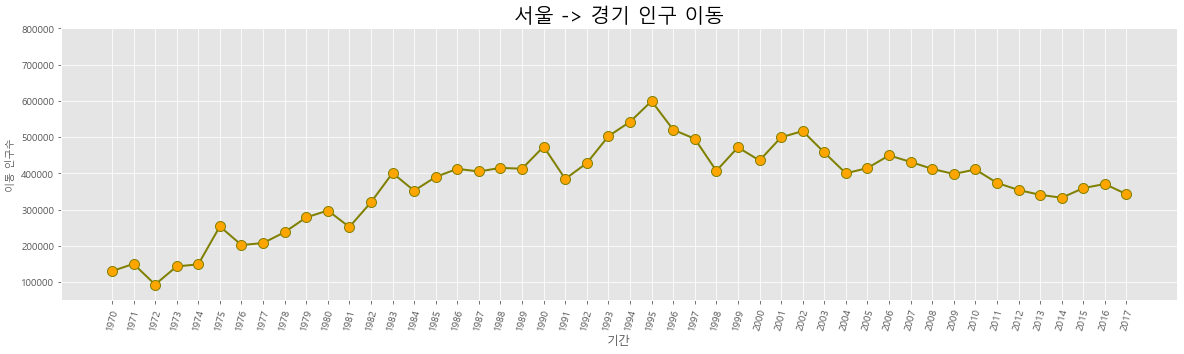

In [110]:
# 그래프 객체 생성 (figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color = 'olive', linewidth=2, label = '서울 -> 경기')

# y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=10)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show() # 변경사항 저장하고 그래프 출력

+ 동일한 그림(axe 객체)에 여러 개의 그래프 추가하기

C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/2334624156.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


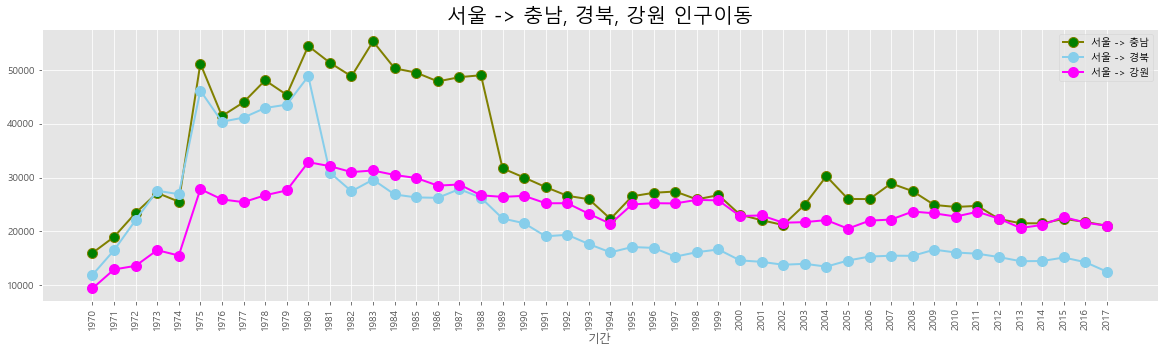

In [112]:
# -- 생략 ( 위 코드와 동일) --

# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
       markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='skyblue',
       markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='magenta',
       markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show() # 변경사항 저장하고 그래프 출력

전반적으로 1970~80년대에는 서울에서 지방으로 전출하는 인구가 많았으나, 1990년 이후로는 줄곧 감소하는 패턴을 보이고 있다.

&nbsp;

+ 서울특별시에서 충청남도, 경상북도, 강원도, 전라남도 4개 지역으로 이동한 인구 변화 그래프 그려보기

ax1~ax4까지 4개의 axe 객체를 생성한다. 각 지역에 해당하는 4개의 행을 선택하고, axe 객체에 하나씩 plot() 메소드를 적용한다. 그리고 범례와 차트 제목등을 표시한다.

C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/270074711.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/270074711.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/270074711.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\구남이\AppData\Local\Temp/ipykernel_22432/270074711.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


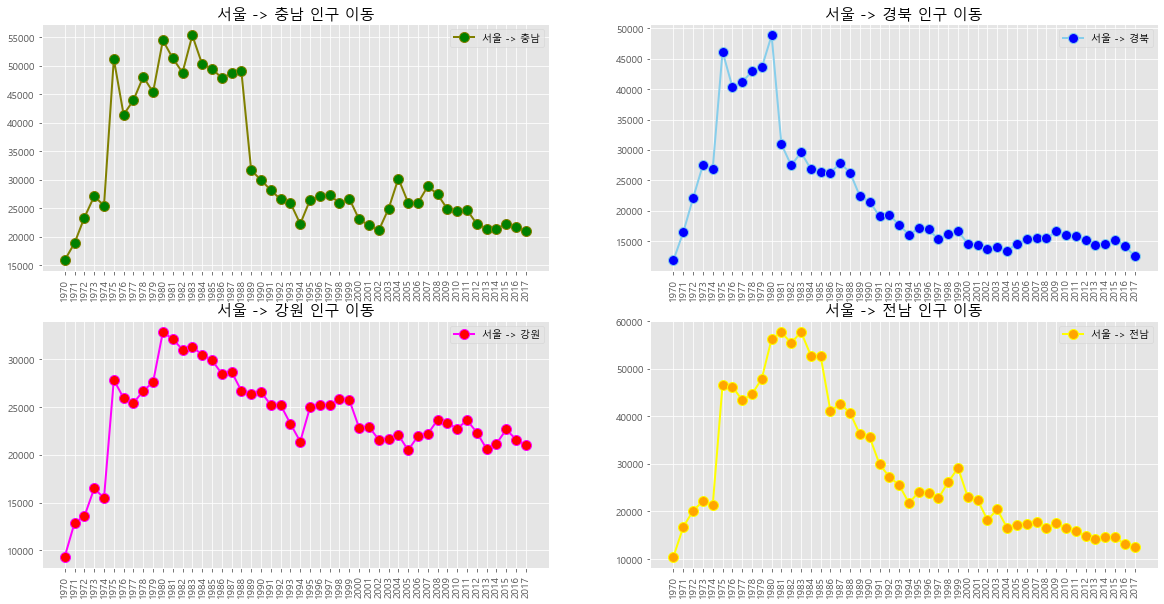

In [116]:
# -- 생략 위 코드와 동일 --

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 15)
ax2.set_title('서울 -> 경북 인구 이동', size = 15)
ax3.set_title('서울 -> 강원 인구 이동', size = 15)
ax4.set_title('서울 -> 전남 인구 이동', size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show() # 변경사항 저장하고 그래프 출력

> + Matplotlib에서 사용할 수 있는 색의 종류
>
>Matplotlib 라이브러리에서 사용할 수 있는 색상의 종류를 확인하는 방법
>
> 헥사코드 : 16진수 코드

In [117]:
# 라이브러리 불러오기
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors = {}

# 컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'